In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

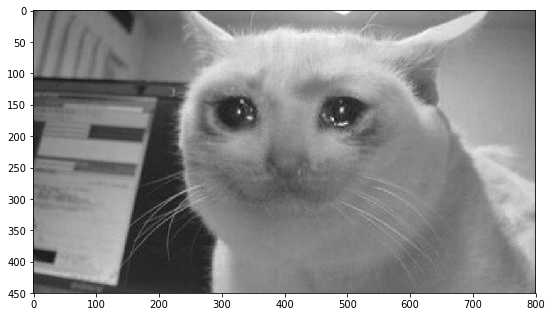

In [2]:
img = Image.open('./sad.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

In [3]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [4]:
U, sigma, V = np.linalg.svd(imgmat)
imgX, imgY = imgmat.shape[0], imgmat.shape[1]

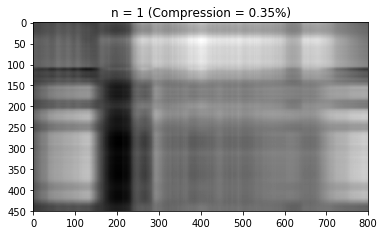

In [5]:
reconstimg = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
compression = (imgX + 1 + imgY) / (imgX * imgY)
compression *= 100
title = "n = 1 (Compression = {0:.2f}%)".format(compression)
plt.title(title)
plt.show()

In [6]:
n = 50
step = 5

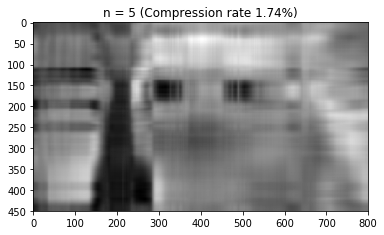

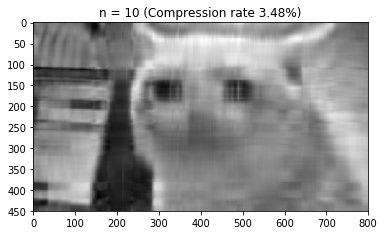

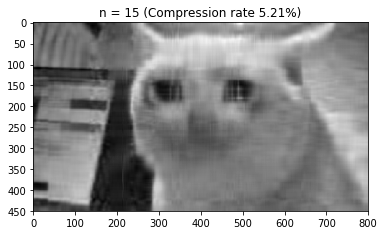

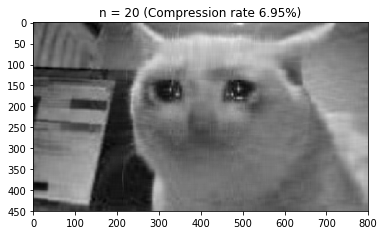

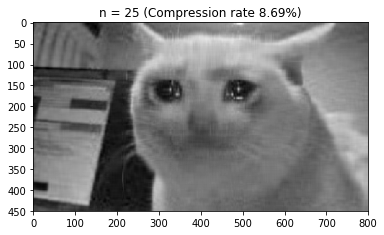

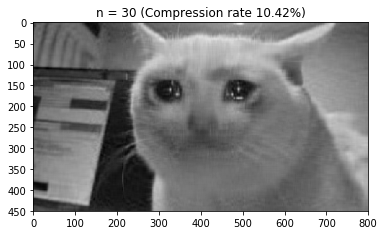

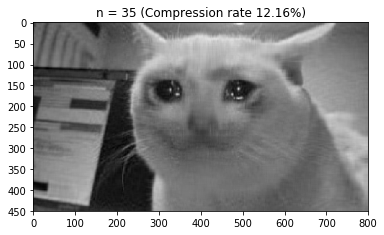

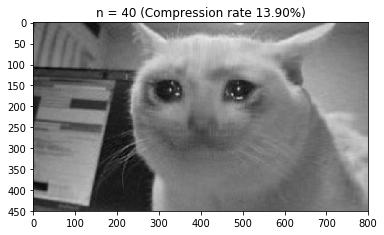

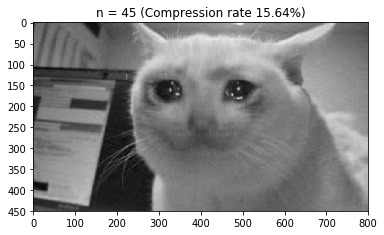

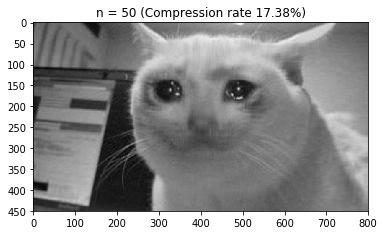

In [7]:
for i in range(5, n + 1, step):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    compression = ((imgX * i) + i + (imgY * i)) / (imgX * imgY)
    compression *= 100
    title = "n = {0} (Compression rate {1:.2f}%)".format(i, compression)
    plt.title(title)
    plt.show()